Makine öğrenimi, karışık meyve suyu yapmak gibidir. En iyi şekilde karıştırılmış meyve suyu elde etmek istiyorsak, tüm meyveleri boyutlarına göre değil, doğru orantılarına göre karıştırmamız gerekir. Niteliklerini karşılaştırmak için bazı bağlamlarda onları benzer yapmazsak, elma ve çileğin aynı olmadığını hatırlamamız yeterli. Benzer şekilde, birçok makine öğrenimi algoritmasında, tüm özellikleri aynı konuma getirmek için ölçeklendirme yapmamız gerekir, böylece önemli bir sayı, sırf büyüklükleri nedeniyle modeli etkilemez.

Makine öğreniminde özellik ölçeklendirme, bir makine öğrenimi modeli oluşturmadan önce verilerin ön işlenmesi sırasındaki en kritik adımlardan biridir. Ölçeklendirme, zayıf bir makine öğrenimi modeli ile daha iyi bir model arasında fark yaratabilir.

Özellik ölçeklendirmenin en yaygın teknikleri Normalleştirme ve Standardizasyondur.

Normalleştirme, değerlerimizi iki sayı arasında, tipik olarak [0,1] veya [-1,1] arasında sınırlamak istediğimizde kullanılır. Standardizasyon, verileri sıfır ortalama ve varyans 1'e dönüştürürken, verilerimizi birimsiz hale getirir . XY düzleminde ölçeklendirmeden sonra verilerin nasıl göründüğünü gösteren aşağıdaki şemaya bakın.

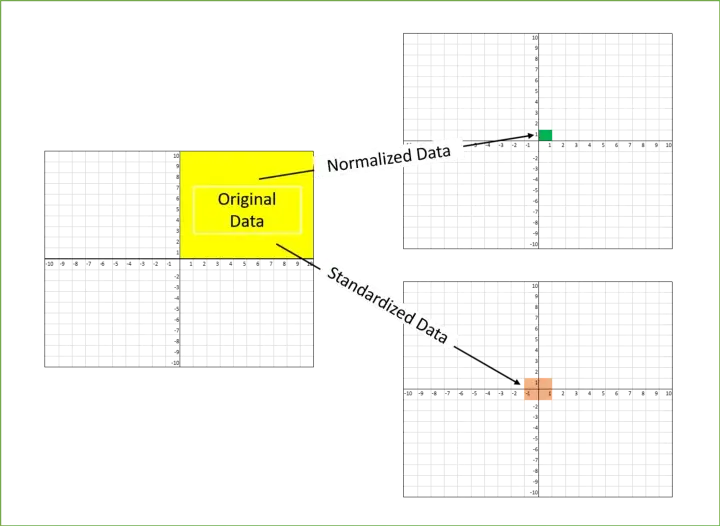

**Değişken dönüşümü yapacağız ama bunu normalizasyon ile mi standardizasyon ile mi yapmalıyız?**

* Burada her veri için kesin doğrudur diyebileceğimiz bir yöntem yok. Dikkat etmemiz gereken şey temel olarak iş probleminize uygun hareket etmeniz ve dönüşüm yapacağınız değişkenlerin normal dağılıma sahip olup olmadığı. Gauss dağılıma sahip verilerinizi normalizasyon ile dönüştürebilirsiniz eğer verileriniz Gauss dağılımdan gelmiyorsa o zaman standardizasyon uygulayarak verilerinizi ölçeklendirebilirsiniz. Eğer vaktiniz varsa veri setine her iki yöntemi de uygulamak ve sonuçları karşılaştırarak karar vermek en doğrusu olur.

    > **Not!!** Eğer tek veri seti üzerinden çalışıyorsanız (Test ve Train için ayrı veri setleriniz yoksa) öncelikle verinizi test-train olarak ayırmanız faydalı olur. Çünkü ölçeklendirme yaparken train setinden test setine bilgi sızabilir. Bu durum modelimiz için yanıltıcı sonuçlara sebep olur. 

### Hangi Algoritmalarda Feature Scaling Kullanılması Gerekir?
Özellikle uzaklık temelli algoritmaların sonucunu etkilerken, gradient descent kullanan algoritmaların hızını etkilemektedir.
* KNN,
* SVM,
* K_Means
* Yapay Sinir Ağları
* Gradient Descent kullanan algoritmalar

### Feature Scaling’e Neden İhtiyaç Duyarız?
Uzaklık temelli makine öğrenmesi algoritmaları(KNN-SVM-KMeans), büyük aralıklı değişkenlerin küçük aralıklı değişkenlerden daha önemli olduğunu düşünüyor!
Örneğin boy ve günlük tüketilen meyve adedi diye iki değişken olsun. Veri setinde boy 150 cm ile 190 cm arasında değişirken, meyve adedi de 0–6 arasında değişsin. Model bu durumda, boy değişkeninin meyve adedi değişkeninden daha önemli olduğu düşüncesiyle kurulmuş oluyor.
Bu duruma istatistikte yanlılık deniyor, biased.. Bu nedenle biz bu aralıkları tüm değişkenlerdeki değerler için aynı aralıklara çekiyoruz. Örneğin -1 ile 1 arasına ya da 0 ile 1 arasına vs.

YSA ve gradient descent temelli algoritmalarda ise global noktaya daha hızlı converge etmesini sağlıyor.

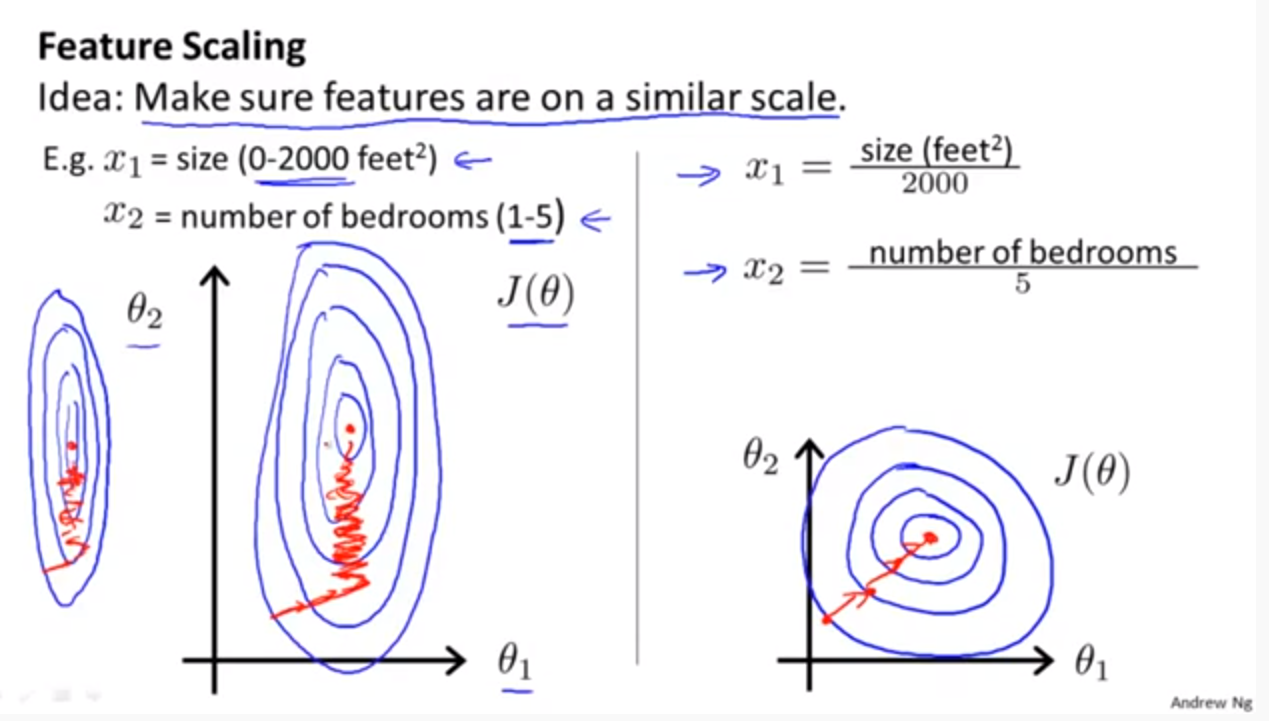

Andrew NG hocanın Feature Scaling ile ilgili vidyosunda, 0–2000 ve 1–5 aralığına(range) sahip iki değişkeni 0–1 aralığına çektiğinde algoritmanın hızının ne kadar artacağından bahsediyor. Sol tarafta global min noktasına ulaşmak için en az 20 adım gerekliyken, sağ tarafta ölçeklendirilmiş değişkenler için bu işlem 3 adımda tamamlanıyor.

## En Çok Kullanılan Feature Scaling Türleri

1. Min Maks Ölçekleyici
2. Standart Ölçekleyici
3. Maks Abs Ölçekleyici
4. Sağlam Ölçekleyici
5. Nicel Transformatör Ölçekleyici
6. Güç Transformatörü Ölçekleyici
7. Birim Vektör Ölçekleyici


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.DataFrame({"WEIGHT":[15,18,12,10],
                   "PRICE":[1,3,2,5]},
                   index=['Orange','Apple','Banana','Grape'])
df

WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5

##  Min-Max Scaler
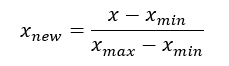

Verinin 0 ile 1 arasında değerler aldığı bir durumdur. Burada dağılım, verinin dağılımı ile benzerdir. Burada aşırı büyük değerler yani ‘outlier’ denilen  dışta kalan verilere karşı hassasiyet durumu vardır, bu yüzden bu değerlerin fazla olduğu bir durumda iyi bir performans gösteremeyebilir.

Diğer yöntemlerin aksine feature_range(min,max) parametresini kullanarak değişkenlerin ölçekleneceği aralığı kendimiz belirtebiliriz. Eğer bu parametreyi boş bırakırsak default olarak değişkenleri [0,1] aralığında ölçeklendirir. Negatif değerler varsa -1 ila 1 aralığındaki verileri küçültür. Aralığı [0,1] veya [0,5] veya [-1,1] gibi ayarlayabiliriz.

[[0.625 0.   ]
 [1.    0.5  ]
 [0.25  0.25 ]
 [0.    1.   ]]


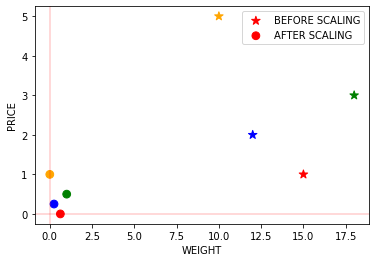

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print(scaler.fit_transform(df)) # 0 - 1 aralığında dönüştürülmüş array çıktısı elde ediyoruz.

# Colon ve index değerlerini vererek Dataframe'e dönüştürelim.
df1 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

# Ölçeklenmemiş verisetinin grafiği
ax = df.plot.scatter(x = 'WEIGHT', 
                     y = 'PRICE', 
                     color = ['red','green','blue','orange'], # (c - color)
                     marker = '*',  # işaretçi
                     s = 80,  # işaretçinin boyutu 
                     label = 'BEFORE SCALING')

# Ölçeklenmiş ve ölçeklenmemiş verileri karşılaştırma grafiği
df1.plot.scatter(x = 'WEIGHT', 
                 y = 'PRICE', 
                 color = ['red','green','blue','orange'],
                 marker = 'o', 
                 s = 60,
                 label = 'AFTER SCALING',
                 ax = ax) # ax ile 2 grafiği birleştiriyoruz.

plt.axhline(y = 0, color = 'red', alpha = 0.2) # axhline:Eksenler boyunca yatay bir çizgi ekler.
plt.axvline(x = 0, color = 'red', alpha = 0.2) # axvline:Eksenler boyunca dikey bir çizgi ekler.

# alpha:işaretçinin şeffaflığı ayarlanır.

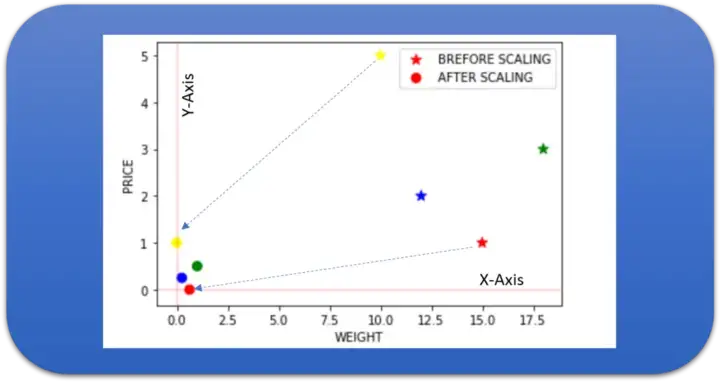

## Standard Scaler

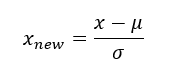

Standardizasyon işleminde her bir sütundaki gözlem birimi ortalamadan çıkarılır ve standart sapmaya bölünür. Böylelikle değişkenler ortalaması 0, varyansı 1 olan normal dağılım aralığına getirilmiş olur. Ancak bu yöntem verinin normal dağıldığı varsayımına dayanır işleme geçmeden önce bu varsayımı kontrol etmelisiniz. Veriler normal bir şekilde dağıtılmıyorsa, kullanılacak en iyi ölçekleyici bu değildir. Standardizasyon ölçeklendirmesi veride bir bilgi kaybına/değişimine neden olmaz yalnızca değişkenleri belirli bir standarda taşımış olur. Bu dönüşümden sonra değişkenler [-1,1] arasında değerler alırlar.


[[ 0.41239305 -1.18321596]
 [ 1.40213637  0.16903085]
 [-0.57735027 -0.50709255]
 [-1.23717915  1.52127766]]


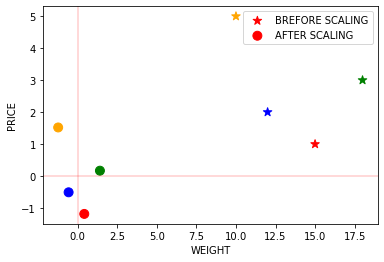

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print(scaler.fit_transform(df)) # -1 ile 1 aralığında dönüştürülmüş array çıktısı elde ediyoruz.

df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape']) 

ax = df.plot.scatter(x='WEIGHT',
                     y='PRICE',
                     color=['red','green','blue','orange'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df2.plot.scatter(x='WEIGHT',
                 y='PRICE',
                 color=['red','green','blue','orange'], 
                 marker = 'o',
                 s=80, 
                 label='AFTER SCALING',
                 ax = ax)

plt.axhline(y = 0, color='red', alpha=0.2)
plt.axvline(x = 0, color='red', alpha=0.2)

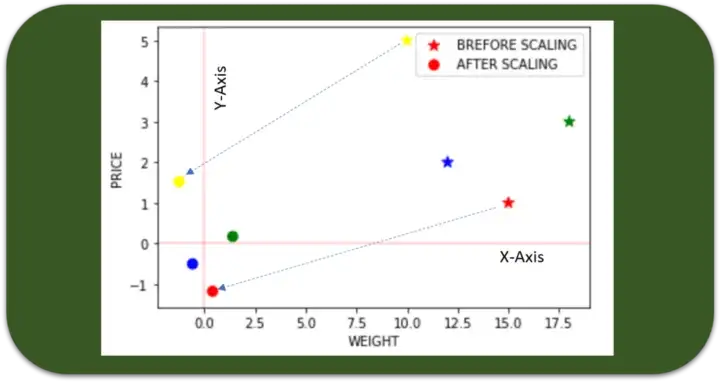

## Max Abs Scaler
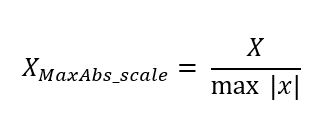

Eğitim setindeki her özelliğin maksimum mutlak değeri 1.0 olacak şekilde her bir özelliği ayrı ayrı ölçekler ve çevirir. Verileri kaydırmaz/merkezlemez ve dolayısıyla herhangi bir seyrekliği yok etmez.
Yalnızca pozitif verilerde, bu ölçekleyici, Min Maks Ölçekleyiciye benzer şekilde davranır ve bu nedenle, önemli aykırı değerlerin varlığından da zarar görür.

Bu ölçekleyici, seyrek CSR veya CSC matrislerine de uygulanabilir.

[[0.83333333 0.2       ]
 [1.         0.6       ]
 [0.66666667 0.4       ]
 [0.55555556 1.        ]]


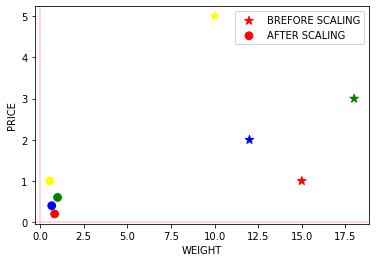

In [28]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

print(scaler.fit_transform(df)) 

df4 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', 
                     y='PRICE',
                     color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df4.plot.scatter(x='WEIGHT', 
                 y='PRICE', 
                 color=['red','green','blue','yellow'],
                 marker = 'o',
                 s=60,label='AFTER SCALING', 
                 ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

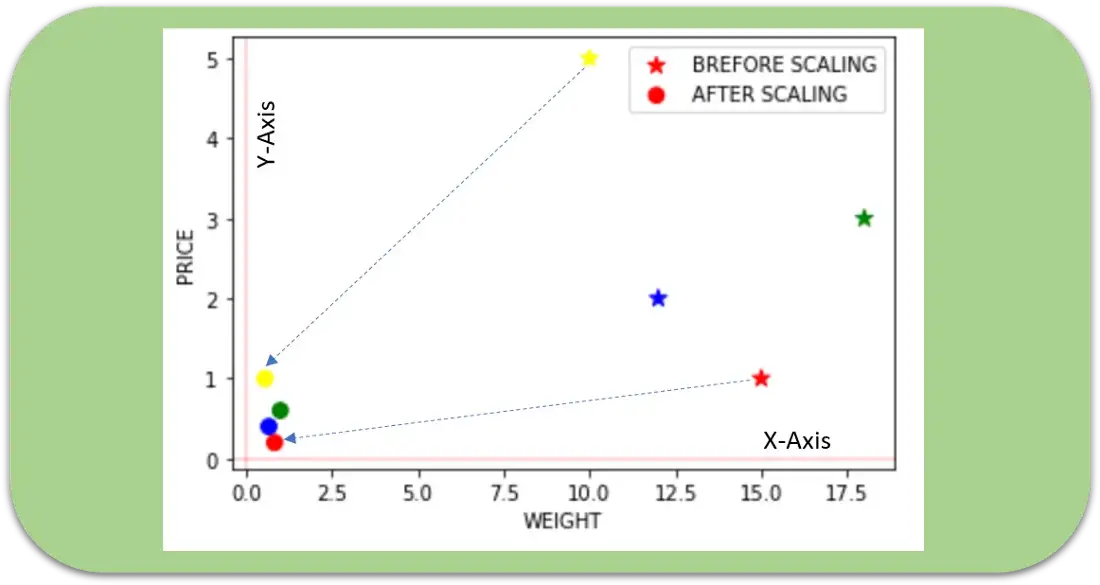

## Robust Scaler

Verilerimiz çok sayıda aykırı değer içeriyorsa verilerin ortalamasını ve standart sapmasını kullanarak ölçeklendirme iyi sonuç vermez. Diğer ölçeklendirme yöntemleri minimum-maksimum- ortalama değeri kullandığı için aykırı değerlere duyarlılardı ancak Robust Scaler yöntemi ölçeklendirmede IQR (Çeyrekler Açıklık) kullandığı için aykırı değerlere karşı sağlam bir yöntemdir.

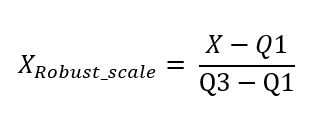

Bu ölçekleyici medyanı kaldırır ve verileri nicelik aralığına göre ölçeklendirir (varsayılanı IQR: Çeyrekler Arası Aralık'tır). IQR, 1. çeyrek (25. çeyrek) ile 3. çeyrek (75. çeyrek) arasındaki aralıktır. Bu ölçekleyicinin merkezleme ve ölçeklendirme istatistikleri yüzdelik dilimlere dayalıdır ve bu nedenle birkaç büyük marjinal aykırı değerden etkilenmez. Aykırı değerlerin dönüştürülen verilerde hala mevcut olduğuna dikkat edin. Ayrı bir aykırı değer kırpılması isteniyorsa, doğrusal olmayan bir dönüşüm gereklidir.

[[ 0.35294118 -0.85714286]
 [ 1.05882353  0.28571429]
 [-0.35294118 -0.28571429]
 [-0.82352941  1.42857143]]


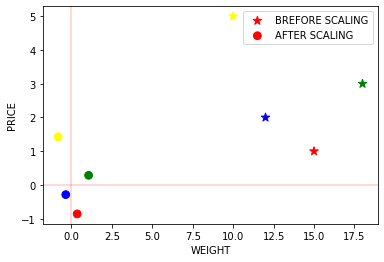

In [29]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

print(scaler.fit_transform(df)) 

df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', 
                     y='PRICE',
                     color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df3.plot.scatter(x='WEIGHT', 
                 y='PRICE', 
                 color=['red','green','blue','yellow'],
                 marker = 'o',
                 s=60,label='AFTER SCALING', 
                 ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

Şimdi bir aykırı değer ekleyelim ve Standart Scaler ve Robust Scaler kullanarak ölçeklendirmenin etkisinin (daire aykırı değeri gösterir) ne olacağını görelim.

In [30]:
dfr = pd.DataFrame({'WEIGHT': [15, 18, 12,10,50],
                    'PRICE': [1,3,2,5,20]},
                    index = ['Orange','Apple','Banana','Grape','Jackfruit'])
print(dfr)

           WEIGHT  PRICE
Orange         15      1
Apple          18      3
Banana         12      2
Grape          10      5
Jackfruit      50     20


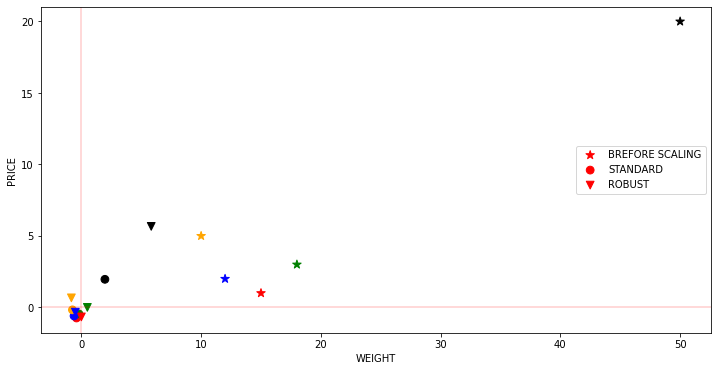

In [34]:
# STANDARD SCALER

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df21 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

ax = dfr.plot.scatter(x='WEIGHT', 
                      y='PRICE',
                      color=['red','green','blue','orange','black'], 
                      marker = '*',
                      s=80, 
                      label='BREFORE SCALING');

df21.plot.scatter(x='WEIGHT', 
                  y='PRICE', 
                  color=['red','green','blue','orange','black'],
                  marker = 'o',
                  s=60,label='STANDARD', 
                  ax = ax,
                  figsize=(12,6))


# ROBUST SCALER

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df31 = pd.DataFrame(scaler.fit_transform(dfr),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape','Jackfruit'])

df31.plot.scatter(x='WEIGHT', 
                  y='PRICE', 
                  color=['red','green','blue','orange','black'],
                  marker = 'v',
                  s=60,
                  label='ROBUST', 
                  ax = ax,
                  figsize=(12,6))

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

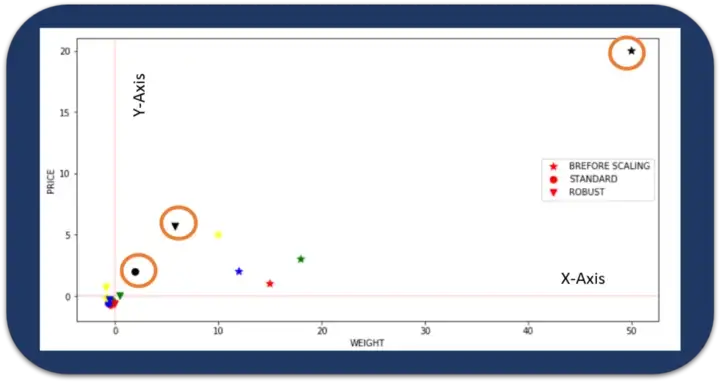

## Quantile Transformer Scaler

Bu yöntem, özellikleri tek tip veya normal bir dağılım izleyecek şekilde dönüştürür . Bu nedenle, belirli bir özellik için, bu dönüşüm en sık değerleri yayma eğilimindedir. Aynı zamanda (marjinal) aykırı değerlerin etkisini de azaltır: bu nedenle bu, sağlam bir ön işleme planıdır.

Bir özelliğin kümülatif dağılım işlevi, orijinal değerleri yansıtmak için kullanılır. Bu dönüşümün doğrusal olmadığına ve aynı ölçekte ölçülen değişkenler arasındaki doğrusal korelasyonları bozabileceğine, ancak farklı ölçeklerde ölçülen değişkenleri daha doğrudan karşılaştırılabilir hale getirdiğine dikkat edin. Bu bazen Rank scaler olarak da adlandırılır.

[[0.66666667 0.        ]
 [1.         0.66666667]
 [0.33333333 0.33333333]
 [0.         1.        ]]


C:\Users\sahik\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\sahik\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn(


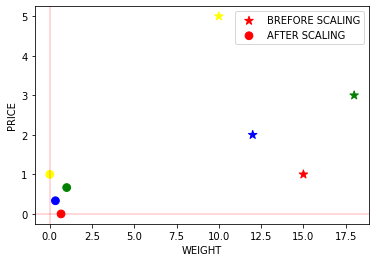

In [35]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

print(scaler.fit_transform(df))

df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', 
                     y='PRICE',
                     color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df6.plot.scatter(x='WEIGHT', 
                 y='PRICE', 
                 color=['red','green','blue','yellow'],
                 marker = 'o',
                 s=60,
                 label='AFTER SCALING', 
                 ax = ax,
                 figsize=(6,4))

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

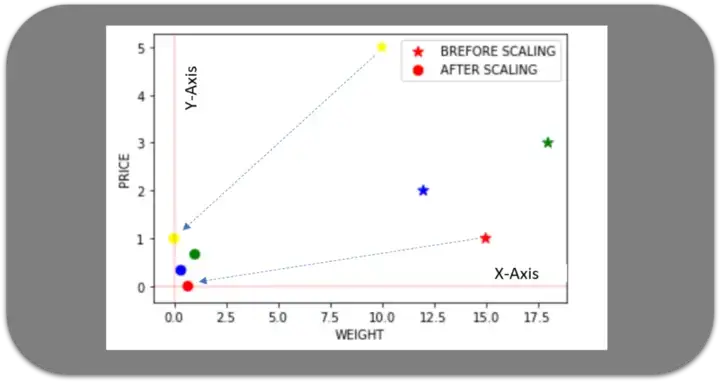
> **!!!** Yukarıdaki örnek sadece açıklama amaçlıdır, çünkü Quantile dönüştürücü, genellikle 1000'den fazla birçok veri noktasına sahip büyük bir veri setimiz olduğunda kullanışlıdır.

## Power Transformer Scaler
Power transformer dönüşümü özellikle normalliğin istendiği durumlarda kullanılır. Değişken varyans durumunda varyansı stabilize etmek ve verideki çarpıklığı azaltmak için maksimum olabilirlik yöntemi kullanılır.

Güç transformatörü, verileri daha fazla Gauss benzeri yapmak için uygulanan bir parametrik, monoton dönüşümler ailesidir . Bu, aralık boyunca eşit olmayan bir değişkenin değişkenliği (değişken varyans) veya normalliğin istendiği durumlar ile ilgili sorunları modellemek için kullanışlıdır.

Güç dönüşümü, varyansı dengelemede ve maksimum olasılık tahmini yoluyla çarpıklığı en aza indirmede en uygun ölçeklendirme faktörünü bulur. Şu anda PowerTransformer'ın Sklearn uygulaması, Box-Cox dönüşümünü ve Yeo-Johnson dönüşümünü desteklemektedir. Varyansı dengelemek ve çarpıklığı en aza indirmek için en uygun parametre, maksimum olasılık yoluyla tahmin edilir. Box-Cox, girdi verilerinin kesinlikle pozitif olmasını gerektirirken, Yeo-Johnson hem pozitif hem de negatif verileri destekler.

[[ 0.50017981 -1.36808362]
 [ 1.32411615  0.35824388]
 [-0.50440496 -0.35824882]
 [-1.31989099  1.36808856]]


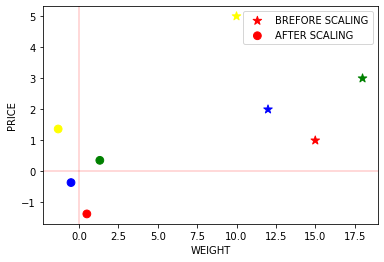

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

print(scaler.fit_transform(df))

df5 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])

ax = df.plot.scatter(x='WEIGHT', 
                     y='PRICE',
                     color=['red','green','blue','yellow'], 
                     marker = '*',
                     s=80, 
                     label='BREFORE SCALING')

df5.plot.scatter(x='WEIGHT', 
                 y='PRICE', 
                 color=['red','green','blue','yellow'],
                 marker = 'o',
                 s=60,
                 label='AFTER SCALING', 
                 ax = ax)

plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

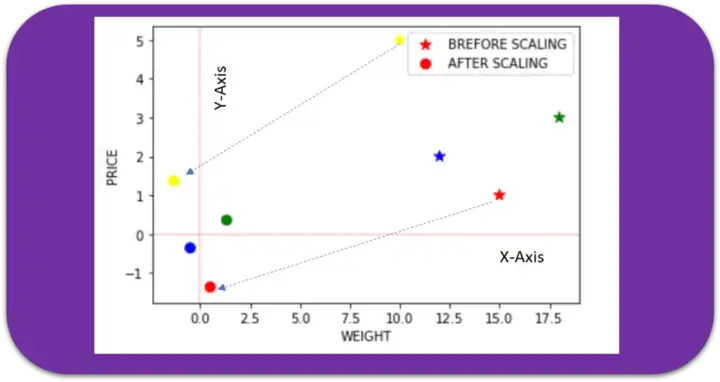

## Unit Vector Scaler
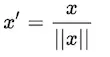

Ölçekleme, tüm öznitelik vektörünün birim uzunlukta olduğu dikkate alınarak yapılır. Bu genellikle her bileşeni vektörün Öklid uzunluğuna (L2 Normu) bölmek anlamına gelir. Bazı uygulamalarda (örneğin, histogram özellikleri), özellik vektörünün L1 normunu kullanmak daha pratik olabilir.

Min-Maks Ölçeklendirme gibi, Birim Vektör tekniği [0,1] aralığında değerler üretir. Kesin sınırları olan özelliklerle uğraşırken bu oldukça kullanışlıdır. Örneğin, görüntü verileriyle uğraşırken renkler yalnızca 0 ile 255 arasında değişebilir.

In [37]:
# L1 normlu birim vektör
df8 = df.apply(lambda x : x / np.linalg.norm(x,1))
df8

WEIGHT     PRICE
Orange  0.272727  0.090909
Apple   0.327273  0.272727
Banana  0.218182  0.181818
Grape   0.181818  0.454545

In [38]:
# L2 normlu birim vektör
df9 = df.apply(lambda x : x / np.linalg.norm(x,2))
df9

WEIGHT     PRICE
Orange  0.532666  0.160128
Apple   0.639199  0.480384
Banana  0.426132  0.320256
Grape   0.355110  0.800641

Çizersek, sırasıyla L1 ve L2 normu için aşağıdaki gibi görünecektir.

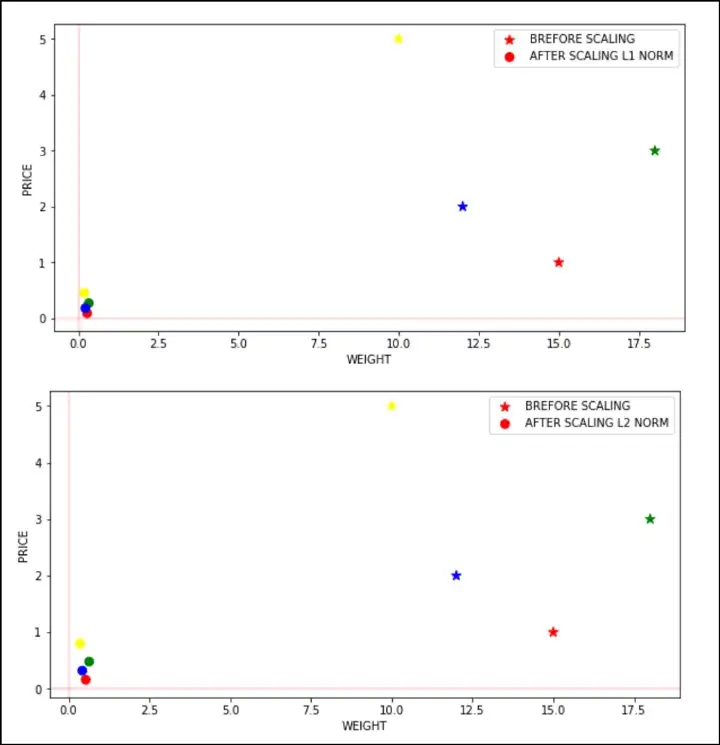

Aşağıdaki diyagram, tüm farklı ölçeklendirme teknikleri için verilerin nasıl yayıldığını göstermektedir ve görebileceğimiz gibi, birkaç nokta üst üste biniyor, bu nedenle ayrı ayrı görünmüyor.

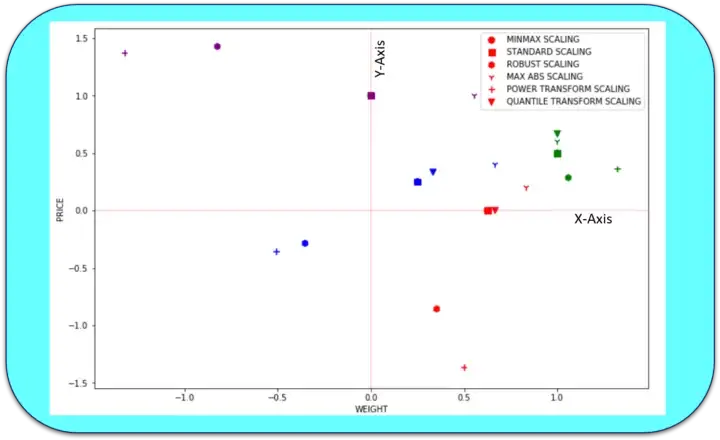

Özellik ölçeklendirme, Makine Öğrenimi ön işlemesinde önemli bir adımdır. Derin öğrenme, daha hızlı yakınsama için özellik ölçeklendirmeyi gerektirir ve bu nedenle hangi özellik ölçeklendirmenin kullanılacağına karar vermek çok önemlidir. Çeşitli algoritmalar için ölçeklendirme yöntemlerinin birçok karşılaştırma araştırması vardır. Yine de, diğer birçok makine öğrenimi adımında olduğu gibi, özellik ölçeklendirme de tek bir sihirli değnek değil, bir deneme yanılma sürecidir.

**Kaynaklar:**
* https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
* https://www.veribilimiokulu.com/veri-hazirliginin-vazgecilmezi-ozellik-olceklendirme/#:~:text=MinMax%20Scaling%2C%20verinin%200%20ile,durumda%20iyi%20bir%20performans%20g%C3%B6steremeyebilir.
* https://kardelennerdem.com/2022/02/08/veri-on-isleme-adim-3-transformation/
* https://ng-dasci.medium.com/feature-scaling-nedir-1fbcd5cd125e